In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [2]:
sales = pd.read_csv('../data/read_summarized_sales_clean.csv')
cci = pd.read_csv('../data/read_cci_clean.csv')
gdp = pd.read_csv('../data/read_gdp_sector_clean.csv')
gdp_pivoted = pd.read_csv('../data/read_gdp_sector_pivot_clean.csv')
rates = pd.read_csv('../data/read_fed_funds_rate_clean.csv')
jobs = pd.read_csv('../data/read_nonfarm_jobs_clean.csv')
fuel = pd.read_csv('../data/read_jet_fuel_clean.csv')
unemployment = pd.read_csv('../data/read_unemployment_rate_clean.csv')

**Revenue**

In [4]:
sales = sales[sales['Total Rev'] > 0]
sales = sales[sales['Year-Qtr'] != '2022-Q4']
#lower_percentile = sales['Total Rev'].quantile(0.10)
#upper_percentile = sales['Total Rev'].quantile(0.90)
#sales = sales[(sales['Total Rev'] >= lower_percentile) & (sales['Total Rev'] <= upper_percentile)]

In [5]:
sales['Sales Percentile'] = sales['Total Rev'].apply(lambda x: percentileofscore(sales['Total Rev'], x))
sales = sales[(sales['Sales Percentile'] >= 10) & (sales['Sales Percentile'] <= 90)]
sales.head()

,Year,Month,Qtr,Year-Month,Year-Qtr,Customer,S_Cons_Order_Class,Market,Total Rev,Order Count,Sales Percentile
0,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Ahsan, Rashaad",At-Once,Non-Profit,5739.30,1,69.906791
1,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Fahmy, Haazim",At-Once,Prof Serv,660.00,1,25.294845
3,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hamed, Zeena",In-Stock,Food/Bev,793.45,2,28.999429
4,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hamed, Zeena",In-Stock,General,286.25,1,13.781625
5,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hamed, Zeena",In-Stock,Local,7720.15,12,74.500666


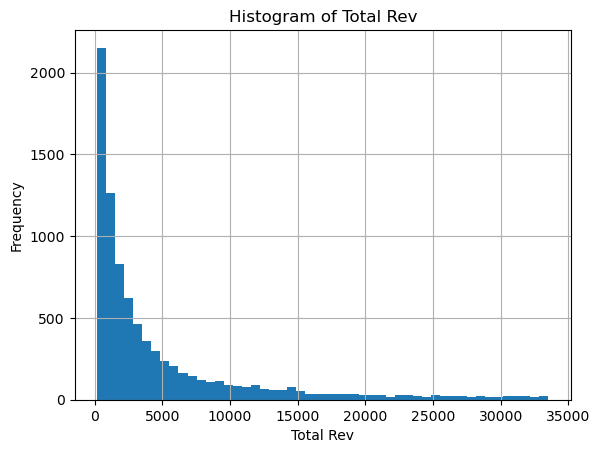

In [6]:
sales['Total Rev'].hist(bins=50)  


plt.title('Histogram of Total Rev')
plt.xlabel('Total Rev')
plt.ylabel('Frequency')
plt.show()

In [7]:
month_rev = sales.groupby('Year-Month').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()
qtr_rev = sales.groupby('Year-Qtr').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()

In [8]:
month_rev.head()

,Year-Month,Total Rev,Order Count
0,2021-Apr,885698.64,4121
1,2021-Aug,988228.43,3529
2,2021-Dec,1011449.33,2557
3,2021-Feb,724454.10,2659
4,2021-Jan,769698.04,2746


In [9]:
qtr_rev.head()

,Year-Qtr,Total Rev,Order Count
0,2021-Q1,2213146.58,8053
1,2021-Q2,2492711.15,10076
2,2021-Q3,2854995.74,8976
3,2021-Q4,2965200.37,6692
4,2022-Q1,2682742.83,6883


**Consumer Confidence Index**

In [14]:
cci.head()

,Category,Year,Month,Year-Month,CCI
0,1/1/2021,2021,Jan,2021-Jan,99.25391
1,2/1/2021,2021,Feb,2021-Feb,99.39012
2,3/1/2021,2021,Mar,2021-Mar,99.74757
3,4/1/2021,2021,Apr,2021-Apr,99.98598
4,5/1/2021,2021,May,2021-May,99.92869


In [15]:
cci_rev = pd.merge(cci, month_rev, on = 'Year-Month')
cci_rev = cci_rev[['Year-Month','CCI', 'Total Rev', 'Order Count']]
cci_rev['Year-Month'] = pd.to_datetime(cci_rev['Year-Month'], format='%Y-%b')
cci_rev.head()

,Year-Month,CCI,Total Rev,Order Count
0,2021-01-01,99.25391,769698.04,2746
1,2021-02-01,99.39012,724454.10,2659
2,2021-03-01,99.74757,718994.44,2648
3,2021-04-01,99.98598,885698.64,4121
4,2021-05-01,99.92869,832979.09,3412


In [16]:
cci_rev[['CCI', 'Total Rev']].corr()

,CCI,Total Rev
CCI,1.00000,-0.43291
Total Rev,-0.43291,1.00000


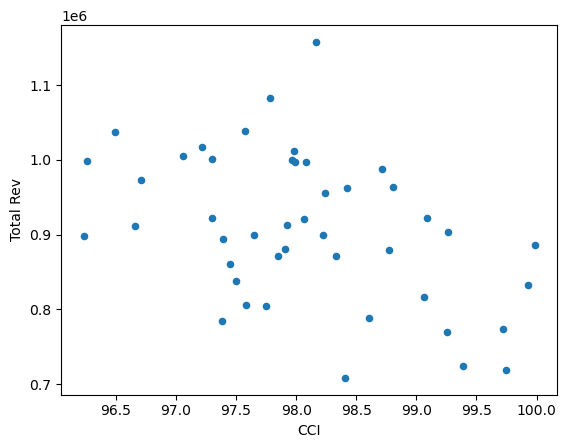

In [18]:
cci_rev.plot(kind="scatter", x="CCI", y="Total Rev");

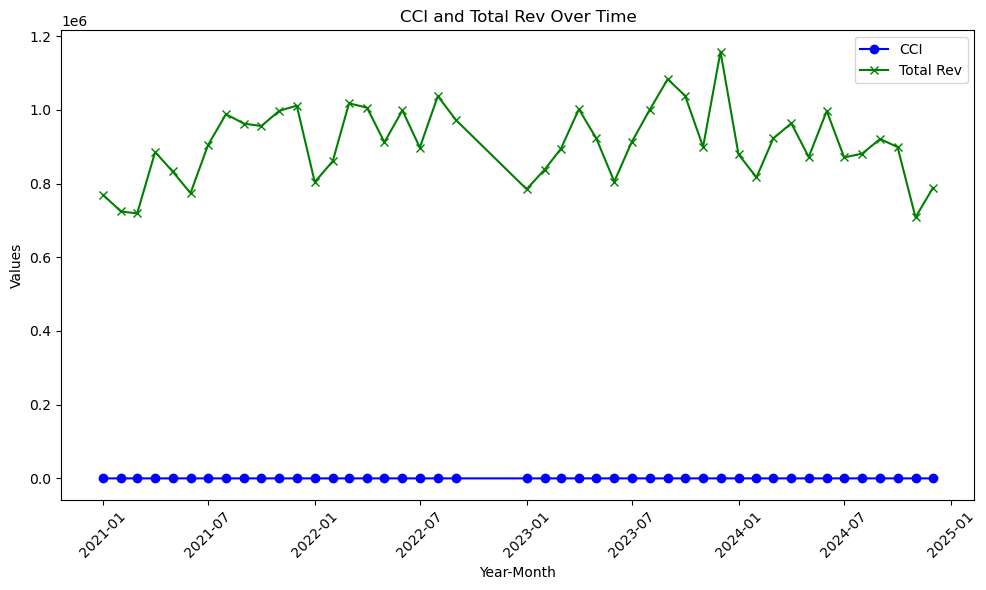

In [23]:
plt.figure(figsize=(10, 6))

# cci line
plt.plot(cci_rev['Year-Month'], cci_rev['CCI'], label='CCI', color='b', marker='o')

# total rev line
plt.plot(cci_rev['Year-Month'], cci_rev['Total Rev'], label='Total Rev', color='g', marker='x')

# labs/title
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.title('CCI and Total Rev Over Time')

#formatting
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Gross Domestic Product by Sector**

In [30]:
gdp.head()

,Category,GDP,Year,Qtr,Year-Qtr
0,"Agriculture, forestry, fishing, and hunting",196.4,2021,Q1,2021-Q1
1,Mining,279.9,2021,Q1,2021-Q1
2,Utilities,386.6,2021,Q1,2021-Q1
3,Construction,995.0,2021,Q1,2021-Q1
4,Manufacturing,2296.3,2021,Q1,2021-Q1


In [32]:
gdp_pivoted.head()

,Year-Qtr,Accommodation and food services,"Agriculture, forestry, fishing, and hunting",Air transportation,"Arts, entertainment, and recreation",Construction,"Educational services, health care, and social assistance",Federal,"Finance, insurance, real estate, rental, and leasing",Information,...,Rail transportation,Retail trade,State and local,Transit and ground passenger transportation,Truck transportation,Utilities,Warehousing and storage,Water transportation,Wholesale trade,Grand Total
0,2021-Q1,575.3,196.4,62.8,191.0,995.0,1963.2,884.8,4825.0,1263.5,...,43.4,1479.9,1871.3,40.4,215.4,386.6,93.7,13.6,1364.0,22656.9
1,2021-Q2,685.3,234.7,88.4,205.7,999.5,1980.8,895.9,4940.7,1300.9,...,44.4,1553.8,1893.2,45.1,226.2,375.3,98.1,17.6,1395.8,23368.8
2,2021-Q3,745.4,244.4,110.6,223.1,1007.5,2013.8,904.6,5040.7,1317.7,...,44.8,1526.0,1932.9,50.5,230.7,390.9,102.6,21.3,1421.3,23921.9
3,2021-Q4,763.7,238.9,122.1,237.2,1044.8,2058.8,915.0,5208.2,1359.3,...,48.0,1581.0,1942.1,51.5,249.2,410.3,106.2,25.4,1479.3,24776.8
4,2022-Q1,761.7,263.3,123.5,243.3,1079.1,2100.3,928.6,5288.7,1340.0,...,48.8,1581.5,1960.9,53.4,255.2,395.5,113.6,22.8,1550.4,25215.3


In [34]:
gdp_rev = pd.merge(gdp_pivoted, qtr_rev , on = 'Year-Qtr')
gdp_rev.head()

,Year-Qtr,Accommodation and food services,"Agriculture, forestry, fishing, and hunting",Air transportation,"Arts, entertainment, and recreation",Construction,"Educational services, health care, and social assistance",Federal,"Finance, insurance, real estate, rental, and leasing",Information,...,State and local,Transit and ground passenger transportation,Truck transportation,Utilities,Warehousing and storage,Water transportation,Wholesale trade,Grand Total,Total Rev,Order Count
0,2021-Q1,575.3,196.4,62.8,191.0,995.0,1963.2,884.8,4825.0,1263.5,...,1871.3,40.4,215.4,386.6,93.7,13.6,1364.0,22656.9,2213146.58,8053
1,2021-Q2,685.3,234.7,88.4,205.7,999.5,1980.8,895.9,4940.7,1300.9,...,1893.2,45.1,226.2,375.3,98.1,17.6,1395.8,23368.8,2492711.15,10076
2,2021-Q3,745.4,244.4,110.6,223.1,1007.5,2013.8,904.6,5040.7,1317.7,...,1932.9,50.5,230.7,390.9,102.6,21.3,1421.3,23921.9,2854995.74,8976
3,2021-Q4,763.7,238.9,122.1,237.2,1044.8,2058.8,915.0,5208.2,1359.3,...,1942.1,51.5,249.2,410.3,106.2,25.4,1479.3,24776.8,2965200.37,6692
4,2022-Q1,761.7,263.3,123.5,243.3,1079.1,2100.3,928.6,5288.7,1340.0,...,1960.9,53.4,255.2,395.5,113.6,22.8,1550.4,25215.3,2682742.83,6883


In [36]:
gdp_rev[['Air transportation', 'Total Rev']].corr()

,Air transportation,Total Rev
Air transportation,1.000000,0.523162
Total Rev,0.523162,1.000000


In [46]:
variables = ['Accommodation and food services',
             'Agriculture, forestry, fishing, and hunting', 'Air transportation',
             'Arts, entertainment, and recreation', 'Construction',
             'Educational services, health care, and social assistance', 'Federal',
             'Finance, insurance, real estate, rental, and leasing', 'Information',
             'Manufacturing', 'Mining', 'Other services, except government',
             'Other transportation and support activities',
             'Pipeline transportation', 'Professional and business services',
             'Rail transportation', 'Retail trade', 'State and local',
             'Transit and ground passenger transportation', 'Truck transportation',
             'Utilities', 'Warehousing and storage', 'Water transportation',
             'Wholesale trade', 'Grand Total', 'Total Rev', 'Order Count']

In [52]:
correlations = []


for column in gdp_rev.columns:
    if column != 'Year-Qtr' and column != 'Total Rev':
        correlation = gdp_rev[column].corr(gdp_rev['Total Rev'])
        correlations.append((column, correlation))
        
correlation_all = pd.DataFrame(correlations, columns=['Sector', 'Correlation Coefficient'])
correlation_all

,Sector,Correlation Coefficient
0,Accommodation and food services,0.492563
1,"Agriculture, forestry, fishing, and hunting",0.408413
2,Air transportation,0.523162
3,"Arts, entertainment, and recreation",0.355550
4,Construction,0.286975
5,"Educational services, health care, and social ...",0.280380
6,Federal,0.300841
7,"Finance, insurance, real estate, rental, and l...",0.351549
8,Information,0.349211
9,Manufacturing,0.486232


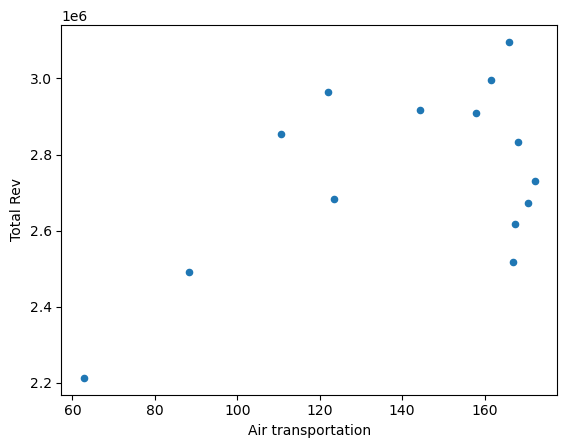

In [38]:
gdp_rev.plot(kind="scatter", x="Air transportation", y="Total Rev");

C:\Users\jdavis\AppData\Local\Temp\ipykernel_17032\1963128984.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gdp_rev['Year-Qtr'], rotation=45)


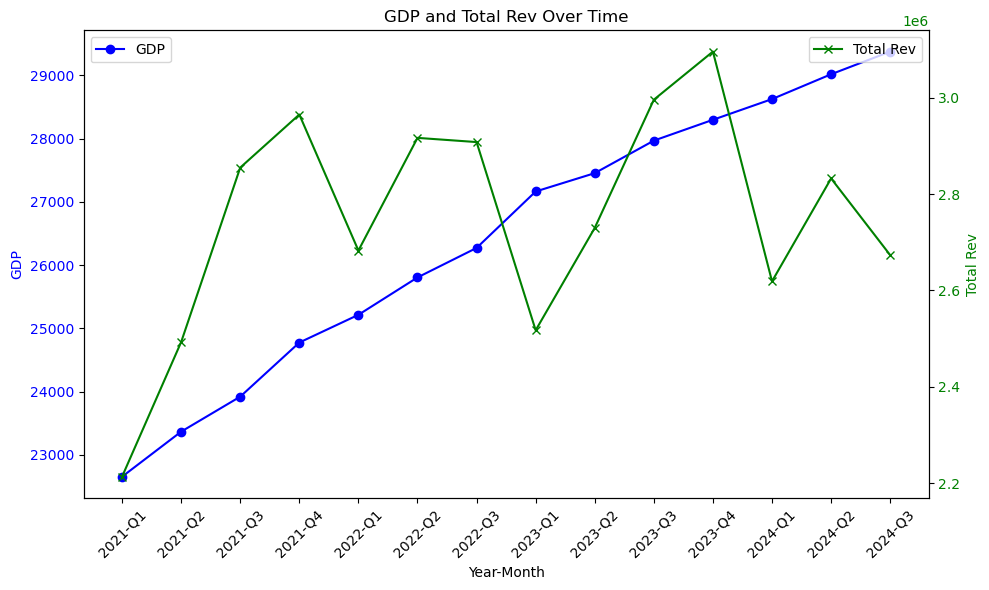

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the GDP data on the first y-axis
ax1.plot(gdp_rev['Year-Qtr'], gdp_rev['Grand Total'], label='GDP', color='b', marker='o')

# Labeling the first y-axis
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('GDP', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Total Rev data on the second y-axis
ax2.plot(gdp_rev['Year-Qtr'], gdp_rev['Total Rev'], label='Total Rev', color='g', marker='x')

# Labeling the second y-axis
ax2.set_ylabel('Total Rev', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and formatting
plt.title('GDP and Total Rev Over Time')

# Rotate x-axis ticks by 45 degrees
ax1.set_xticklabels(gdp_rev['Year-Qtr'], rotation=45)

# Show legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
rates.head()

In [ ]:
jobs.head()

In [ ]:
fuel.head()

In [ ]:
unemployment.head()